In [104]:
%matplotlib inline

Compare different ways of fitting an Omori law to aftershock sequences

In [105]:
import datetime
import numpy as np
import pylab
from plotting.generic_mpl import plot_xy
import eqcatalog
import eqcatalog.omori as omori
from ipy_render_html import render_html

In [106]:
cat = eqcatalog.rob.query_local_eq_catalog(start_date=1992, end_date=1992, event_type='all')
cat = cat[~np.isnan(cat.get_magnitudes(Mtype='ML'))]
cat.name = "Roermond 1992"
cat.print_info()

+-------------------+-------------------------+
|     Parameter     |          Value          |
+-------------------+-------------------------+
|    Catalog name   |      Roermond 1992      |
| Earthquake number |            78           |
|     Start time    | 1992-01-01T00:00:00.000 |
|      End time     | 1992-12-31T23:59:59.000 |
|  Longitude bounds |     3.8265 / 7.3928     |
|  Latitude bounds  |    50.1627 / 51.2000    |
|    Depth range    |      0.4 / 24.0 km      |
|         ML        |  n=78, min=1.2, max=5.8 |
|         MS        |  n=1, min=1.2, max=5.4  |
|         MW        |  n=1, min=1.7, max=5.3  |
|    Event types    |        ke (n=78)        |
+-------------------+-------------------------+


In [107]:
dc_method = eqcatalog.declustering.LinkedWindowMethod()
#dc_window = eqcatalog.declustering.Gruenthal2009Window()
dc_window = eqcatalog.declustering.GardnerKnopoff1974Window()
Mrelation = {'ML': 'Ahorner1983'}

In [108]:
mainshock = cat.get_event_by_id(987)
Mm = mainshock.get_mag(Mrelation['ML'])

In [109]:
aftershocks = dc_method.get_aftershocks(mainshock, cat, dc_window, Mrelation)

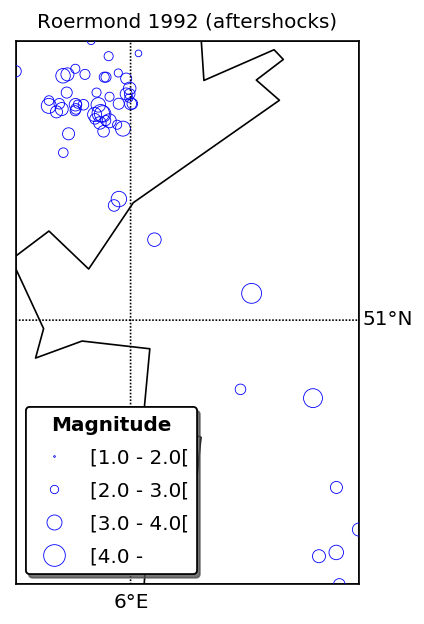

In [110]:
aftershocks.plot_map()

In [111]:
aftershocks.print_info()

+-------------------+-----------------------------+
|     Parameter     |            Value            |
+-------------------+-----------------------------+
|    Catalog name   | Roermond 1992 (aftershocks) |
| Earthquake number |              56             |
|     Start time    |   1992-04-13T01:22:53.480   |
|      End time     |   1992-11-04T03:56:01.050   |
|  Longitude bounds |       5.8688 / 6.2603       |
|  Latitude bounds  |      50.8100 / 51.2000      |
|    Depth range    |        8.0 / 24.0 km        |
|         ML        |    n=56, min=1.2, max=3.9   |
|    Event types    |          ke (n=56)          |
+-------------------+-----------------------------+


In [112]:
render_html(aftershocks.get_formatted_list(as_html=True))

ID,Date,Time,Name,Lon,Lat,Z,ML,Agency
3596,1992-04-13,01:22:53.480000,UETTERATH (DE),6.138,51.019,24.0,3.9,ROB
988,1992-04-13,01:31:08.040000,ROERMOND (NL),5.927,51.163,15.6,2.1,ROB
989,1992-04-13,01:33:32.500000,ROERMOND (NL),5.921,51.151,15.7,2.5,ROB
990,1992-04-13,01:46:03.540000,ROERMOND(N),5.972,51.143,17.6,1.9,
991,1992-04-13,01:53:30.700000,ROERMOND(N),5.937,51.180,14.6,1.7,
992,1992-04-13,02:02:24.030000,ROERMOND(N),5.938,51.151,15.2,2.0,
993,1992-04-13,02:04:31.300000,ROERMOND(N),5.923,51.120,18.3,1.8,
994,1992-04-13,02:05:07.470000,MONTFORT(N),5.981,51.082,17.8,2.2,
995,1992-04-13,02:08:20.840000,ROERMOND(N),5.937,51.154,15.0,2.4,
996,1992-04-13,02:30:40.950000,ROERMOND(N),5.946,51.154,14.8,2.0,


Determine cutoff magnitude

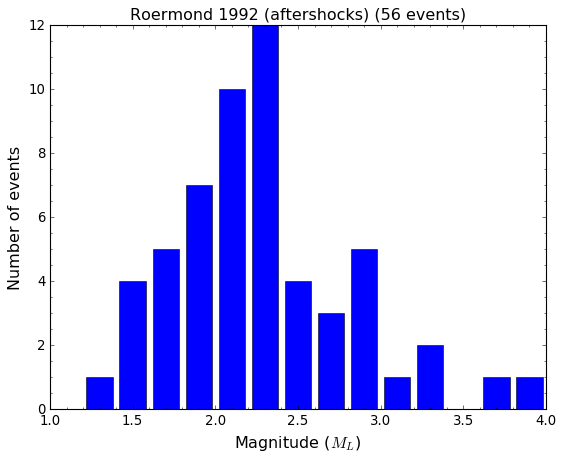

In [113]:
aftershocks.plot_mag_histogram(1.2, 4.0, 0.2, Mtype='ML', Mrelation={})

Number of events constrained by completeness criteria: 55 out of 55


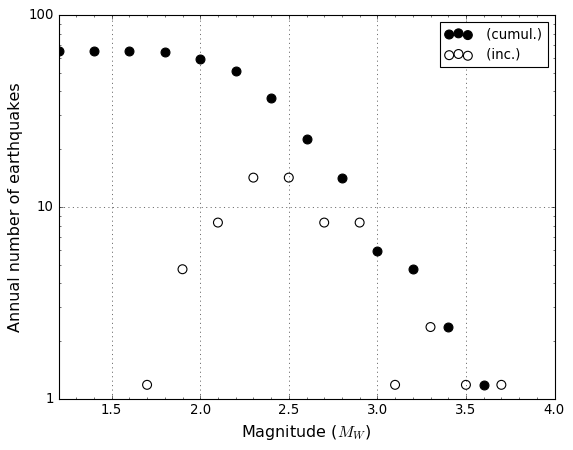

In [114]:
Mtype = 'MW'
completeness = aftershocks.get_uniform_completeness(1.2, Mtype=Mtype)
Mrelation = aftershocks.default_Mrelations[Mtype]
mfd = aftershocks.get_incremental_mfd(1.2, 4.0, 0.2, Mtype=Mtype, Mrelation=Mrelation,
                                      completeness=completeness)
mfd.plot()

In [115]:
Mc = 2.2
aftershocks_Mc = aftershocks.subselect(Mmin=Mc, Mtype=Mtype, Mrelation=Mrelation)
aftershocks_Mc.name = aftershocks.name + ' (Mmin=%.1f)' % Mc
aftershocks_Mc.print_info()

+-------------------+----------------------------------------+
|     Parameter     |                 Value                  |
+-------------------+----------------------------------------+
|    Catalog name   | Roermond 1992 (aftershocks) (Mmin=2.2) |
| Earthquake number |                   44                   |
|     Start time    |        1992-04-13T01:22:53.480         |
|      End time     |        1992-11-04T03:56:01.050         |
|  Longitude bounds |            5.8688 / 6.2603             |
|  Latitude bounds  |           50.8100 / 51.1782            |
|    Depth range    |             8.0 / 24.0 km              |
|         ML        |         n=44, min=1.9, max=3.9         |
|    Event types    |               ke (n=44)                |
+-------------------+----------------------------------------+


Fit aftershock rate (binned time intervals)

In [116]:
time_delta = np.timedelta64(6, 'h')
time_unit = eqcatalog.time.get_datetime_unit(time_delta)

start_date = mainshock.datetime
end_date = mainshock.datetime + np.timedelta64(1, 'M').astype('m8[s]')

## Compute elapsed time for nth aftershock
n = 3
elapsed_time = aftershocks_Mc[n-1].datetime - mainshock.datetime
elapsed_time_delta = elapsed_time/time_delta
print('Elapsed time until %dth aftershock: %f' % (n, elapsed_time_delta))

observed_rate0, bins_times = aftershocks_Mc.bin_by_time_interval(start_date, end_date, time_delta)
print('Total nr. of aftershocks in 1 month: %d' % np.sum(observed_rate))
delta_t0 = np.arange(len(bins_times)) + 0.5
print(observed_rate0)

Elapsed time until 3th aftershock: 0.037481
Total nr. of aftershocks in 1 month: 953
[ 22.   1.   0.   3.   2.   2.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   1.
   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [117]:
observed_rate0 /= time_delta.astype('int')
popt, pcov, perr = omori.OmoriLaw.fit_rate(delta_t0, observed_rate0,
                                           initial_guess=(1,0.01, 1.2))
K, c, p = popt
print(K, c, p)
print(perr)

0.820329352966 0.00100000000045 2.1630462074
[ 1.21976328  0.56357215  1.38676403]


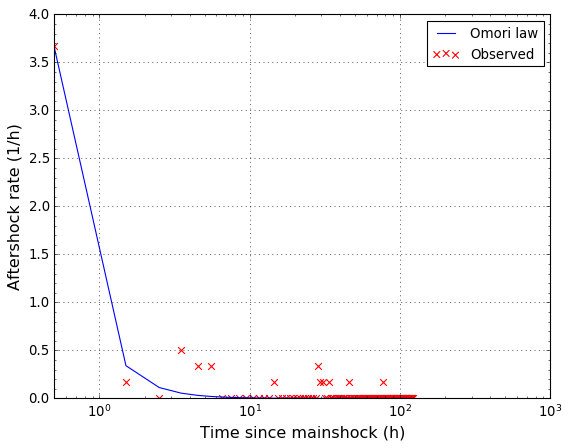

In [118]:
mol0 = omori.OmoriLaw(K, c, p, Mm, Mc, time_unit=time_unit)
mol0.plot_rate(delta_t0, observed_delta_t=delta_t0, observed_rate=observed_rate0, xscaling='log')

Fit looks relatively good, but note large relative error on K and unrealistic p value due to insufficient resolution of time bins. As a result, predicted number of aftershocks is severely overestimated.

In [119]:
## Predicted number of aftershocks in 1 day
mol0.get_num_aftershocks(24)

2175.336314133979

Fit aftershock rate (unbinned time interval)

Integrated nr. of aftershocks: 34.5
[  6.40316206e+02   1.47517052e+02   5.81937704e+01   3.41435174e+01
   2.52333746e+01   1.97170992e+01   1.57563648e+01   5.63640982e+00
   3.21628113e+00   2.40478530e+00   6.95792191e-01   3.89306800e-01
   1.46228295e-01   4.25715512e-02]


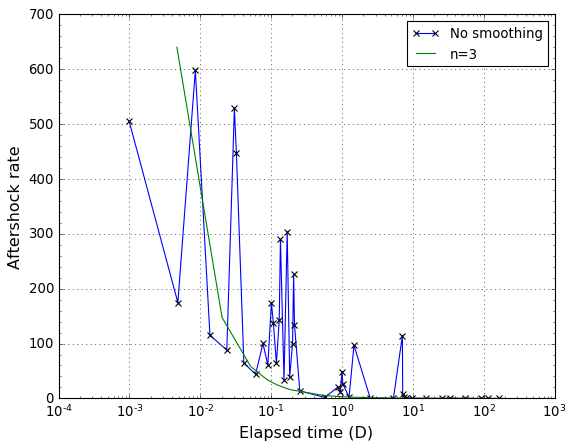

In [124]:
time_delta = np.timedelta64(1, 'D')
time_unit = eqcatalog.time.get_datetime_unit(time_delta)

aftershock_dts = aftershocks_Mc.get_datetimes()
elapsed_times = (aftershock_dts - mainshock.datetime) / time_delta
elapsed_times_raw = np.hstack([[0], elapsed_times])

time_intervals_raw = np.diff(elapsed_times_raw)
observed_rate_raw = 1. / time_intervals_raw
delta_t1_raw = elapsed_times_raw[:-1] + time_intervals_raw / 2.

#observed_rate = (np.arange(len(delta_t2)) + 1) / delta_t2

## Compute time intervals for n aftershocks
n = 3
delta_t1, observed_rate1 = omori.calc_smoothed_rates(elapsed_times_raw, n)
print('Integrated nr. of aftershocks: %.1f' % np.trapz(observed_rate1, delta_t1))
print(observed_rate)

datasets = [(delta_t1_raw, observed_rate_raw), (delta_t1, observed_rate1)]
labels = ['No smoothing', 'n=%d' % n]
linestyles = ['-', '-']
markers = ['x', '']
plot_xy(datasets, labels=labels, linestyles=linestyles, markers=markers,
       xlabel='Elapsed time (%s)' % time_unit, ylabel='Aftershock rate', xscaling='log',
       xgrid=1, ygrid=1)

In [125]:
observed_rate1 /= time_delta.astype('int')
popt, pcov, perr = omori.OmoriLaw.fit_rate(delta_t1, observed_rate1,
                                           initial_guess=(1,0.01, 1.2))
K, c, p = popt
print(K, c, p)
print(perr)

2.28771424361 0.001 1.08970139677
[ 0.2130978   0.00032819  0.02963   ]


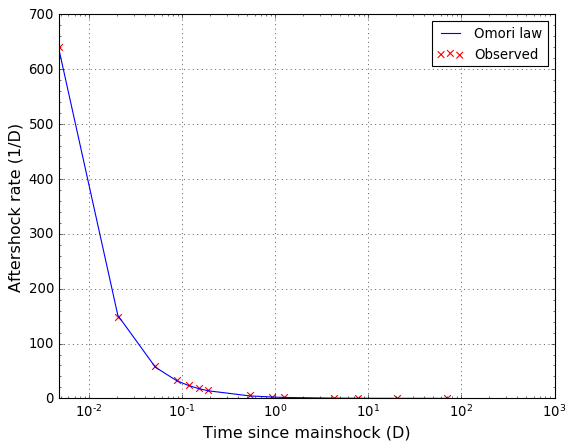

In [126]:
mol1 = omori.OmoriLaw(K, c, p, Mm, Mc, time_unit=time_unit)
mol1.plot_rate(delta_t1, observed_delta_t=delta_t1, observed_rate=observed_rate1, xscaling='log')

In [127]:
print(mol1.get_num_aftershocks(1))

21.890811043760113


Fit cumulative number of aftershocks (unsmoothed)

In [128]:
delta_t2 = delta_t1_raw.copy()
observed_N2 = np.arange(1, len(delta_t2)+1)

In [129]:
delta_t2 *= time_delta.astype('int')
popt, pcov, perr = omori.OmoriLaw.fit_cumulative(delta_t2, observed_N2,
                                                 initial_guess=(1, 0.01, 1.2))
K, c, p = popt
print(K, c, p)
print(perr)

5.22075700056 0.0324809957306 1.22748093358
[ 0.16442095  0.00597829  0.03263905]


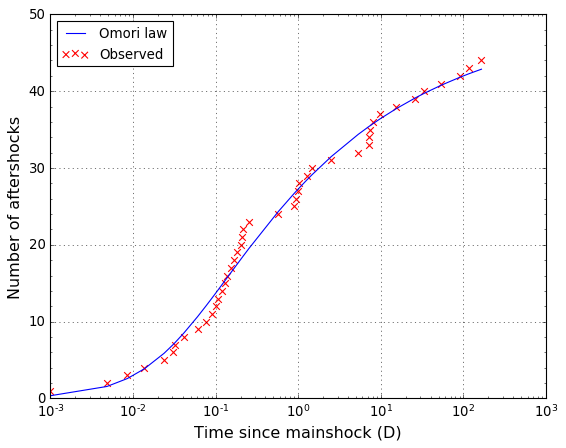

In [130]:
mol2 = omori.OmoriLaw(K, c, p, Mm, Mc, time_unit=time_unit)
mol2.plot_cumulative(delta_t2, observed_delta_t=delta_t2, xgrid=1, ygrid=1, xscaling='log')

In [131]:
print(mol2.get_num_aftershocks(1))

27.261398624501236


Fit cumulative number of aftershocks (smoothed)

In [151]:
observed_N3 = np.arange(1, len(delta_t1)+1) * n

In [152]:
delta_t3 = delta_t1.copy()
popt, pcov, perr = omori.OmoriLaw.fit_cumulative(delta_t3, observed_N3, initial_guess=(1, 0.01, 1.2))
K, c, p = popt
print(K, c, p)
print(perr)

5.12670306154 0.0298723654467 1.23117932008
[ 0.24206886  0.00904189  0.05584356]


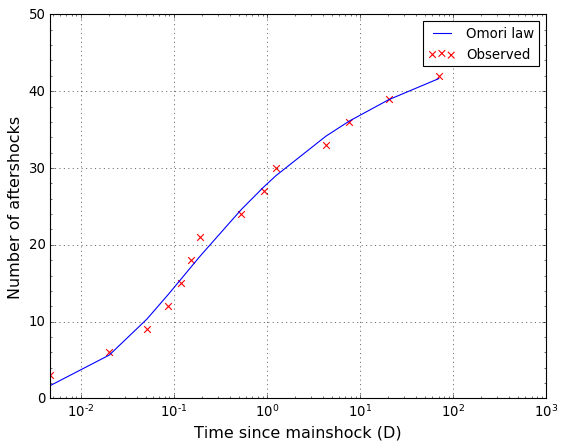

In [153]:
mol3 = omori.OmoriLaw(K, c, p, Mm, Mc, time_unit=time_unit)
mol3.plot_cumulative(delta_t3, observed_delta_t=delta_t3, observed_N=observed_N3,
                    xgrid=1, ygrid=1, xscaling='log')

Compare fit on cumulative number of aftershocks with aftershock rates

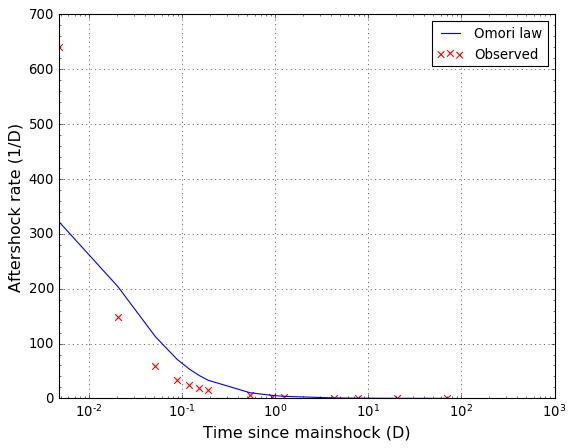

In [154]:
mol3.plot_rate(delta_t3, observed_delta_t=delta_t1, observed_rate=observed_rate1, xscaling='log')

In [141]:
print(mol3.get_num_aftershocks(1))

81.78419157577959


Fit Omori using elapsed times for aftershocks in first 7 days

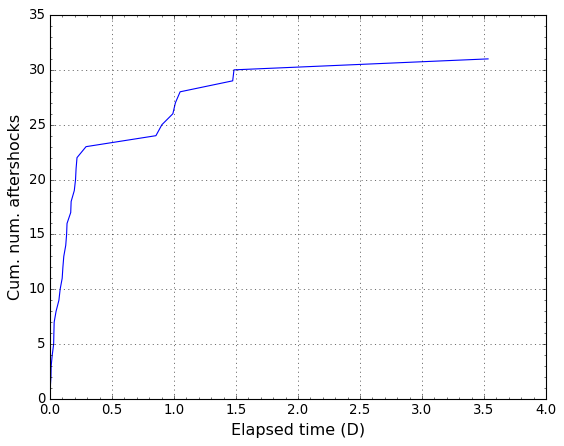

In [142]:
time_delta = np.timedelta64(1, 'D')
time_unit = eqcatalog.time.get_datetime_unit(time_delta)

start_time = mainshock.datetime
end_date = mainshock.datetime + np.timedelta64(7, 'D').astype('m8[s]')
as_dts = aftershocks_Mc.get_datetimes()
delta_t4 = (as_dts - start_time) / time_delta
delta_t4 = delta_t4[as_dts <= end_date]
datasets = [(delta_t4, range(1, len(delta_t4)+1))]
plot_xy(datasets=datasets, xlabel='Elapsed time (%s)' % time_unit, ylabel='Cum. num. aftershocks',
       xgrid=1, ygrid=1)

In [143]:
(K, c, p) = eqcatalog.omori.estimate_omori_params(delta_t4, initial_guess=(0.001, 1.0),
                                                  minimize_method='Nelder-Mead', Ts=None,
                                                  bounds=((0.0001, 0.1), (0.1,2)), verbose=False)
print(K, c, p)

4.8582531241 0.0777077200278 1.54607015081


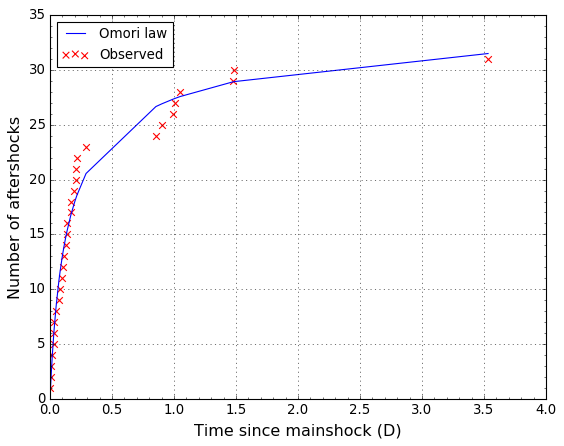

In [144]:
mol4 = omori.OmoriLaw(K, c, p, Mm, Mc, time_unit=time_unit)
mol4.plot_cumulative(delta_t4, observed_delta_t=delta_t4, xscaling='lin')

In [145]:
print(mol4.get_num_aftershocks(1))

27.3612784281321


MLE fit

In [146]:
delta_t5 = elapsed_times_raw[1:]
K, c, p = omori.estimate_omori_params(delta_t5)
print(K, c, p)

5.50074038169 0.0356042039717 1.18421681942


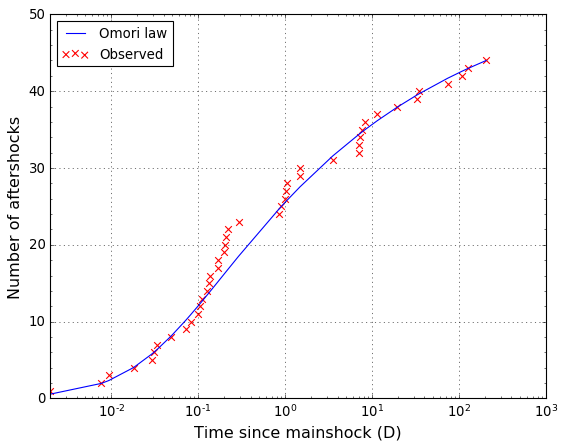

In [147]:
mol5 = omori.OmoriLaw(K, c, p, Mm, Mc, time_unit=time_unit)
mol5.plot_cumulative(delta_t5, observed_delta_t=delta_t5, xscaling='log')

In [148]:
print(mol5.get_num_aftershocks(1))

25.53049026956967


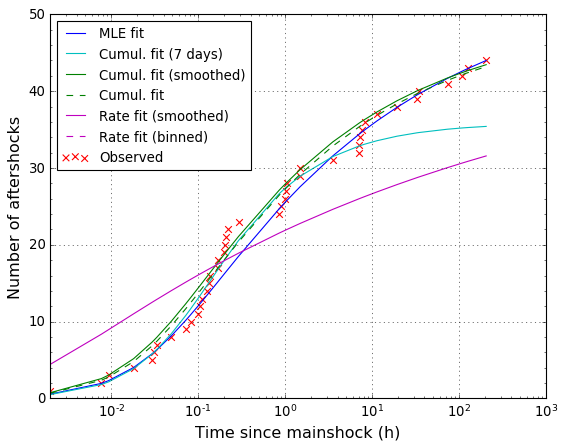

In [155]:
ax = mol5.plot_cumulative(delta_t5, observed_delta_t=delta_t5, label='MLE fit', xscaling='log',
                         fig_filespec='wait')
mol4.plot_cumulative(delta_t5, label='Cumul. fit (7 days)', color='c', xscaling='log', ax=ax,
                    fig_filespec='wait')
mol3.plot_cumulative(delta_t5, label='Cumul. fit (smoothed)', color='g', xscaling='log', ax=ax,
                    fig_filespec='wait')
mol2.plot_cumulative(delta_t5, label='Cumul. fit', color='g', linestyle='--', xscaling='log', ax=ax,
                    fig_filespec='wait')
mol1.plot_cumulative(delta_t5, label='Rate fit (smoothed)', color='m', xscaling='log', ax=ax,
                    fig_filespec='wait')
mol0.plot_cumulative(delta_t5, label='Rate fit (binned)', color='m', linestyle='--', xscaling='log',
                     ax=ax)

Papers:
https://aees.org.au/wp-content/uploads/2015/06/4-Ghasemi-Hadi-Afterschock.pdf
http://www1.rcep.dpri.kyoto-u.ac.jp/~benescu/Work/Nanjo_et_al_JGR_2007.pdf